# Rainfall_Weather_Forecast_Prediction

# 

Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
#Loading the dataset(Creating the dataframe)
df=pd.read_csv('Rainfall_weather_forecast.csv')

In [90]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [91]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [92]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [93]:
df.sample(15)
          

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
3629  2009-06-11    Wollongong      6.6     16.0       0.0          NaN   
866   2011-05-16        Albury      0.8     11.2       0.0          NaN   
135   2009-04-15        Albury     10.7     21.9       0.0          NaN   
864   2011-05-14        Albury      3.8     14.3       1.8          NaN   
3808  2016-03-02   Williamtown     18.5     31.4       0.0          6.4   
1624  2013-09-23     Newcastle     10.6     30.8       0.6          NaN   
2525  2014-11-21       Penrith     20.3     40.5       0.0          NaN   
8252  2012-06-30        Darwin     15.9     30.1       0.0          5.6   
4933  2010-11-22     Melbourne     13.7     33.3       0.2          5.2   
2765  2015-07-19       Penrith      6.2     17.1       0.0          NaN   
7166  2011-08-19  PerthAirport      9.5     23.4       0.0          2.4   
6271  2011-06-21      Brisbane      6.1     22.8       0.0          2.2   
8177  2012-04-16        Darwin     24.5     34.3       0.0          6.2   
7041  2011-03-17  PerthAirport     20.7     32.7       0.0          9.4   
2983  2016-03-29   Williamtown     18.5     25.5       0.0          5.8   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
3629       NaN          SW           37.0          W  ...        42.0   
866        NaN           W           20.0         SE  ...        99.0   
135        NaN           W           63.0         NW  ...        44.0   
864        NaN           W           35.0          W  ...        82.0   
3808      11.5           E           37.0        NNE  ...        64.0   
1624       NaN         NaN            NaN         NE  ...        55.0   
2525       NaN          NW           63.0        ENE  ...        37.0   
8252      10.8         ESE           26.0          S  ...        78.0   
4933      12.1         SSW           54.0        NNE  ...        68.0   
2765       NaN          SW           22.0        SSW  ...        65.0   
7166      10.5         NNE           35.0         NE  ...        48.0   
6271       9.6           W           26.0        NaN  ...        70.0   
8177      11.0          SE           37.0        ESE  ...        62.0   
7041      11.3           E           54.0        ENE  ...        57.0   
2983       1.7         SSW           37.0         NW  ...        95.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
3629         37.0       1020.0       1018.0       NaN       NaN     10.6   
866          74.0       1033.0       1030.5       8.0       8.0      4.2   
135          27.0       1008.2       1009.8       2.0       NaN     20.5   
864          46.0       1020.7       1021.8       NaN       7.0      6.8   
3808         49.0       1021.4       1018.8       5.0       7.0     24.1   
1624         18.0          NaN          NaN       0.0       0.0     19.7   
2525         11.0          NaN          NaN       NaN       NaN     30.0   
8252         35.0       1013.4       1009.8       0.0       0.0     22.2   
4933         21.0       1020.5       1017.1       1.0       2.0     20.5   
2765         39.0          NaN          NaN       NaN       NaN     11.8   
7166         31.0       1019.2       1015.8       0.0       1.0     15.7   
6271         39.0       1016.3       1010.2       1.0       0.0     14.4   
8177         35.0       1011.1       1007.1       3.0       3.0     28.4   
7041         42.0       1011.7       1008.8       1.0       2.0     25.2   
2983         72.0       1017.2       1014.8       7.0       7.0     21.4   

      Temp3pm  RainToday  RainTomorrow  
3629     15.5         No            No  
866      10.9         No            No  
135      18.9         No            No  
864      13.6        Yes            No  
3808     30.3         No            No  
1624     30.5         No            No  
2525     39.0         No            No  
8252     28.9         No            No  
4933     32.4         No            No  
2765     16.3  

In [94]:

print("Columns :",df.columns) #checking the columns or features names
print("shape:", df.shape) #checking the size of the datasets( rows and columns)
print("info:", df.info()) #checking the info( datatypes of columns, null or not null)
print("data types:", df.dtypes) # checking the datatypes of the columns

Columns : Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
shape: (8425, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am

In [95]:
#seperating the day, month and year from date column

df['Month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day
df['year']=pd.DatetimeIndex(df['Date']).year

In [96]:
#Now we can drop the column'Date' as there are 'Day','Month' and 'year' columns present separately.
df.drop(['Date'],axis=1,inplace=True)

In [97]:
df.isnull().sum() #checking the null values in columns

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Month               0
day                 0
year                0
dtype: int64

In [98]:
# checking the duplicate values
df.duplicated().sum()

1663

In [99]:
duplicated_rows = df.duplicated()
print(df[duplicated_rows])

         Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
3674  Williamtown     13.1     31.6       0.0          6.4      11.1   
3675  Williamtown     16.6     34.1       0.0          6.6       9.9   
3676  Williamtown     17.5     26.3      19.8          7.8       NaN   
3677  Williamtown     14.7     21.4       NaN          NaN       NaN   
3678  Williamtown     11.0     22.5       NaN          NaN       NaN   
...           ...      ...      ...       ...          ...       ...   
6143    Melbourne     20.3     25.0       0.0         11.6       7.3   
6144    Melbourne     16.1     24.5       0.0          4.4      12.4   
6145    Melbourne     16.6     30.7       NaN          8.0      13.0   
6146    Melbourne     20.0     30.4       NaN          8.2      12.1   
6147    Melbourne     20.5     34.9       NaN          9.4       9.2   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
3674           E           33.0          N          E  ...  

In [100]:
df.drop_duplicates(inplace=True)    # dropping the duplicated row from the dataset

In [101]:
df.isnull().sum() #checking the null values in columns

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Month               0
day                 0
year                0
dtype: int64

In [102]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']




In [103]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month', 'day', 'year']




In [104]:
#Filling the null values in object datatypes columns
df['WindGustDir']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [105]:
#Removing the null values from the columns
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
for i in numerical_col :
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [106]:
df.isnull().sum() #again checking the null values in columns

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
day              0
year             0
dtype: int64

In [107]:
# checking the missing value in each column
positions = df.isin(['?'])
count_per_column = positions.sum(axis=0)
print("\nCount of '?' in each column:")
print(count_per_column)


Count of '?' in each column:
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
day              0
year             0
dtype: int64


In [108]:
#checking the existence of any whitespace,NA and - values
df.isin([' ','NA','-']).sum().any()

False

In [109]:
df.nunique().to_frame("no. of unique values")  # no. of unique values in all columns of the Dataframe

no. of unique values
Location                         12
MinTemp                         285
MaxTemp                         331
Rainfall                        250
Evaporation                     116
Sunshine                        140
WindGustDir                      16
WindGustSpeed                    52
WindDir9am                       16
WindDir3pm                       16
WindSpeed9am                     34
WindSpeed3pm                     35
Humidity9am                      90
Humidity3pm                      94
Pressure9am                     384
Pressure3pm                     374
Cloud9am                          9
Cloud3pm                          9
Temp9am                         304
Temp3pm                         328
RainToday                         2
RainTomorrow                      2
Month                            12
day                              31
year                             10

In [110]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64


MinTemp
13.2    128
12.0     57
14.8     53
12.7     53
10.8     52
       ... 
26.6      1
28.0      1
26.9      1
1.4       1
26.0      1
Name: count, Length: 285, dtype: int64


MaxTemp
23.5    99
19.0    66
19.8    62
22.3    54
23.8    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: count, Length: 331, dtype: int64


Rainfall
0.0      4472
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: count, Length: 250, dtype: int64


Evaporation
4.6      3010
4.0       141
3.0       125
2.2       118
2.4       116
         ... 
145.0       1
33.8        1
59.2        1
20.8        1
0.7 

In [111]:
df.shape

(6762, 25)

# Data Visualization:

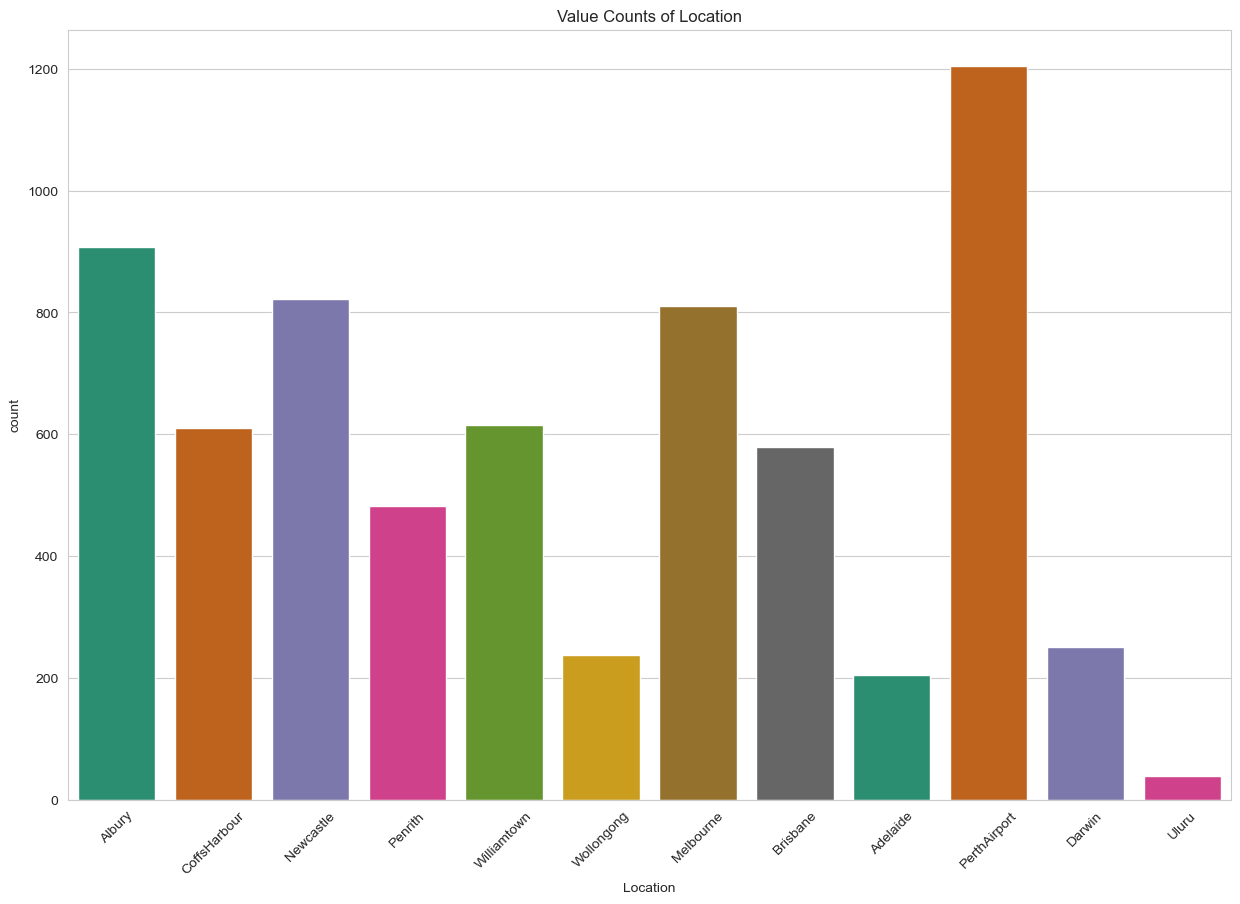

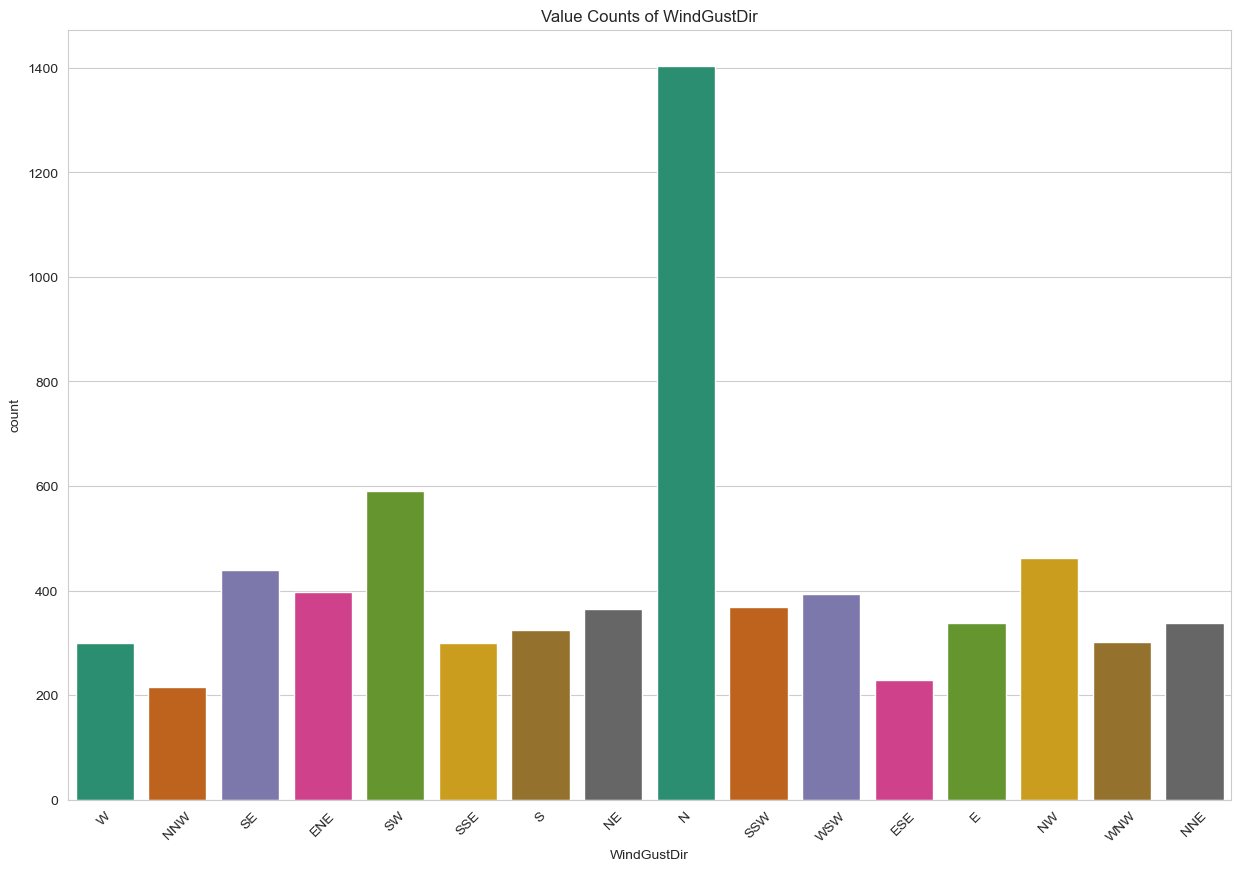

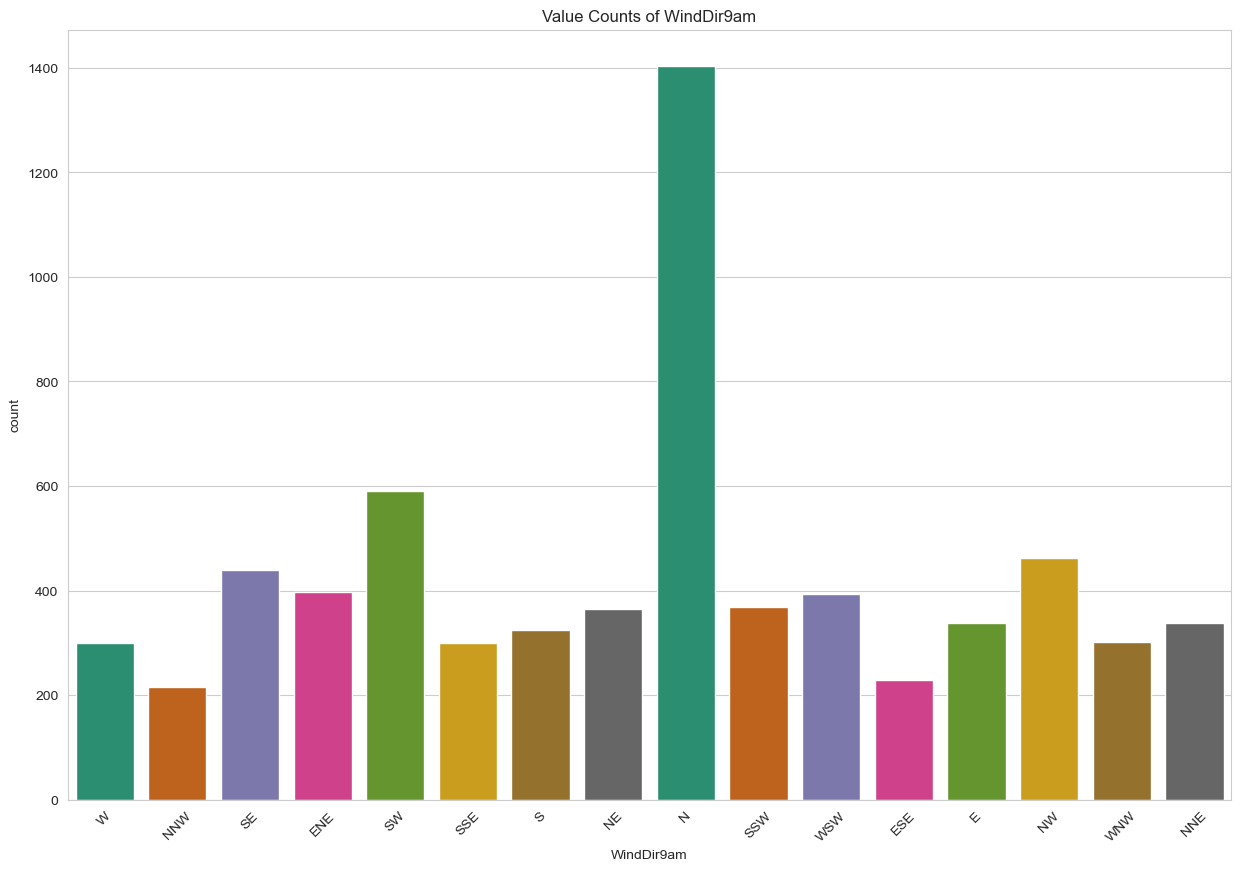

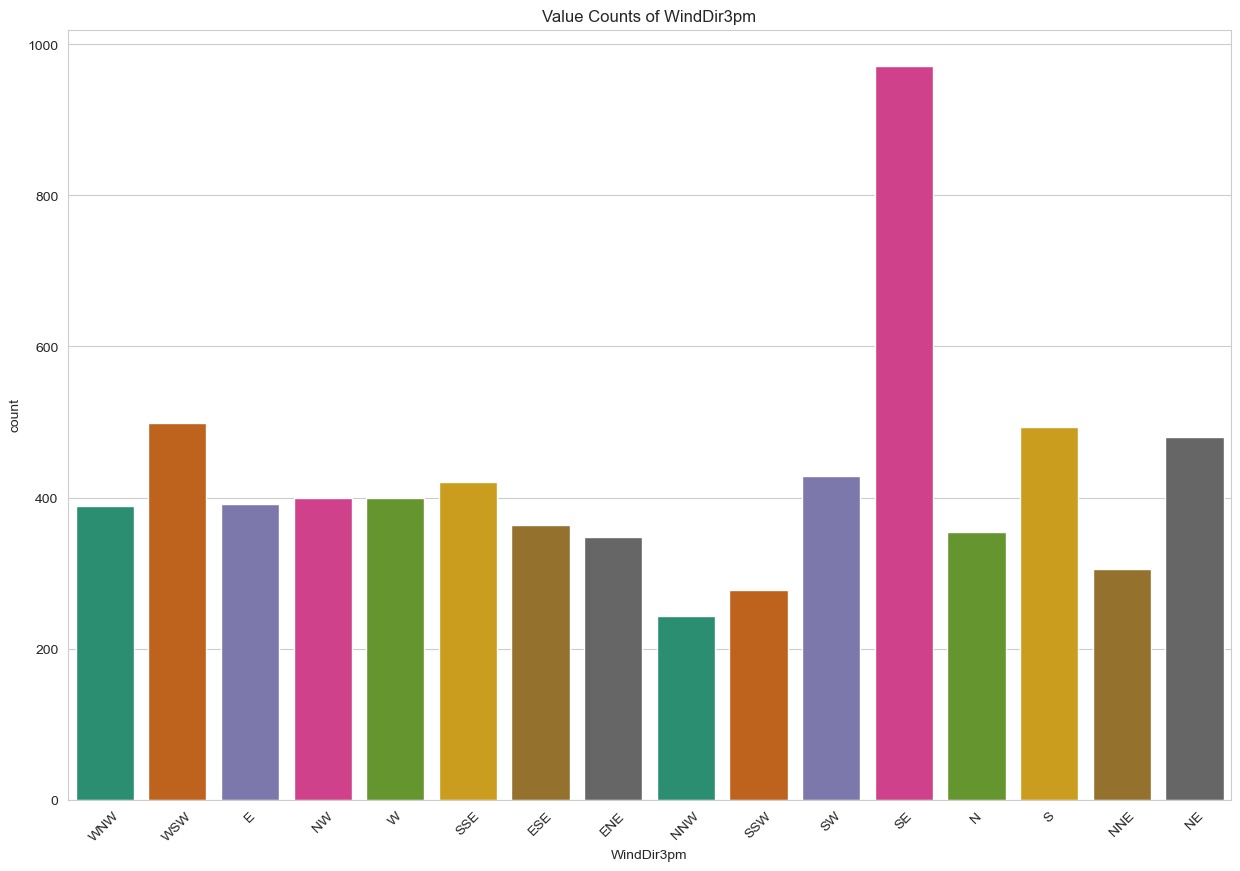

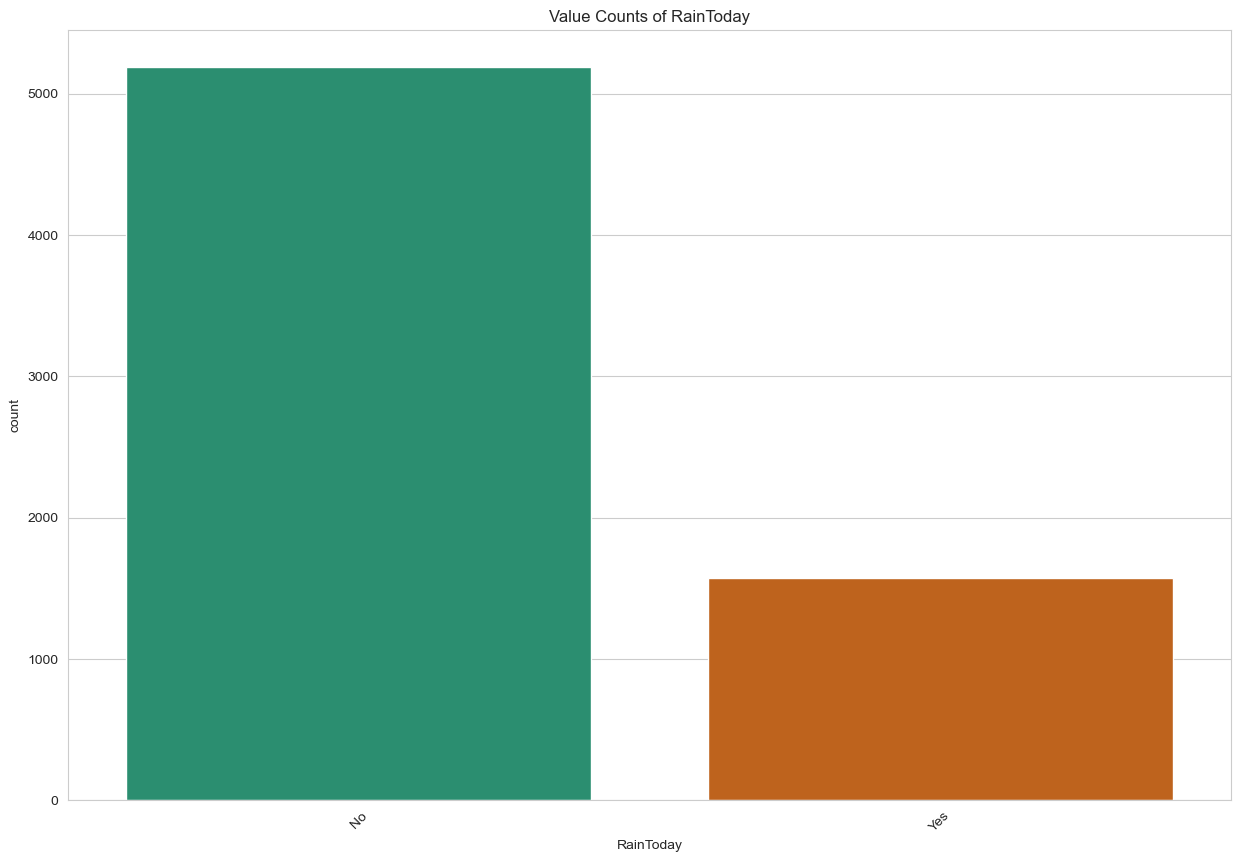

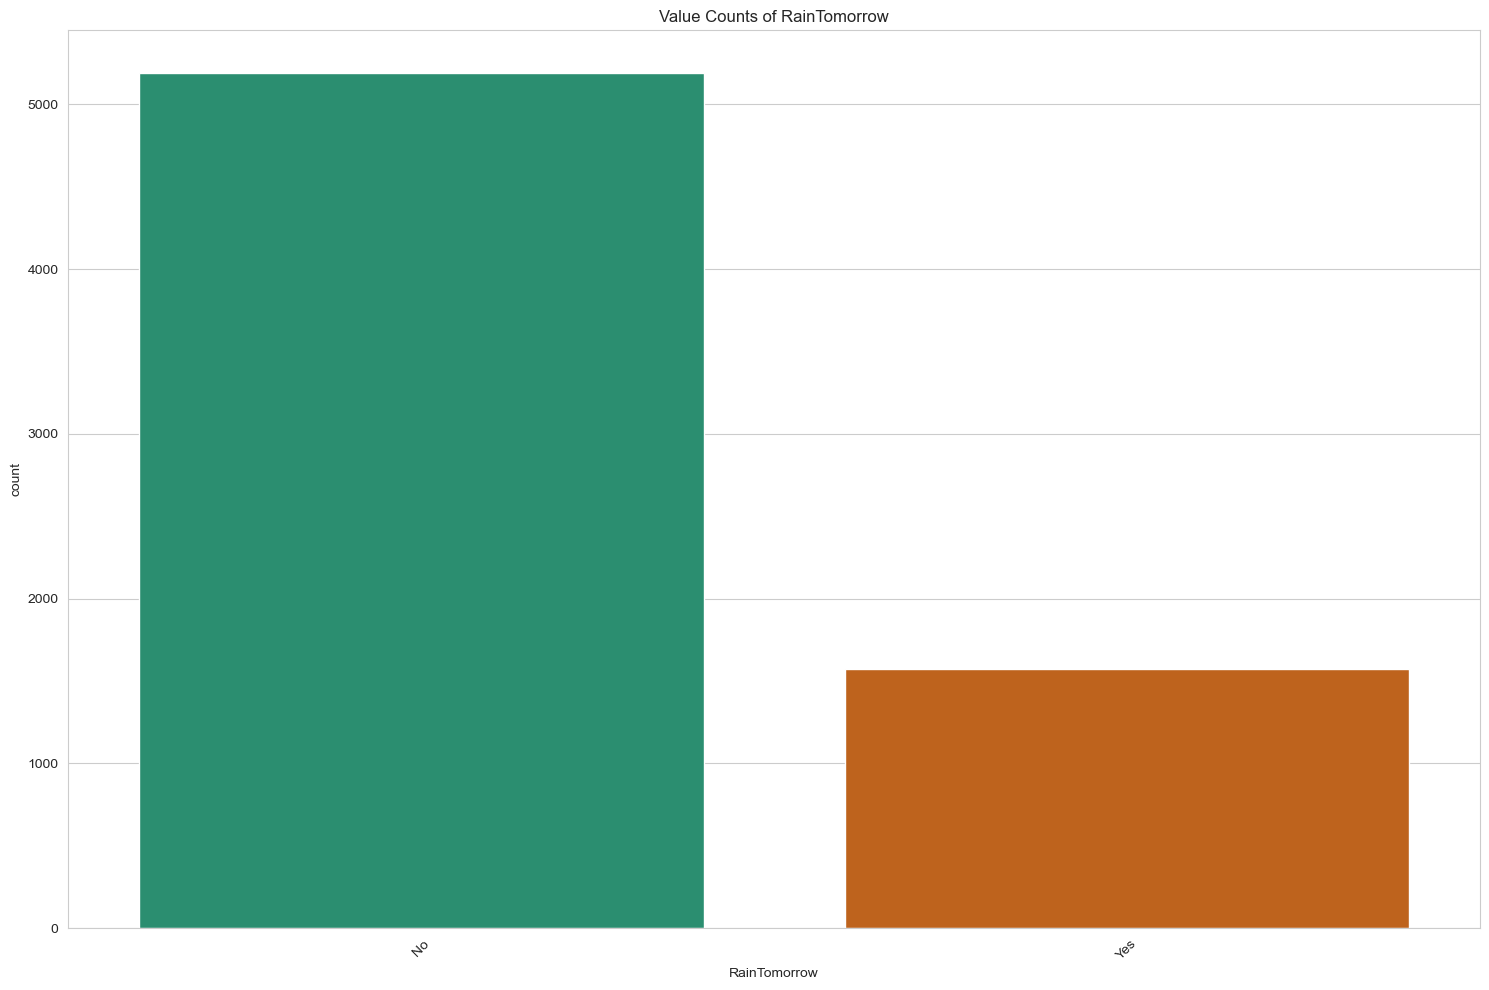

In [112]:
for i in categorical_col:
        sns.set_style('whitegrid')
        plt.figure(figsize=(15,10))
        sns.countplot(x=i, data=df,palette='Dark2')
        plt.title(f'Value Counts of {i}')
        plt.xticks(rotation=45)
        plt.xlabel(i)
plt.tight_layout()
plt.show()

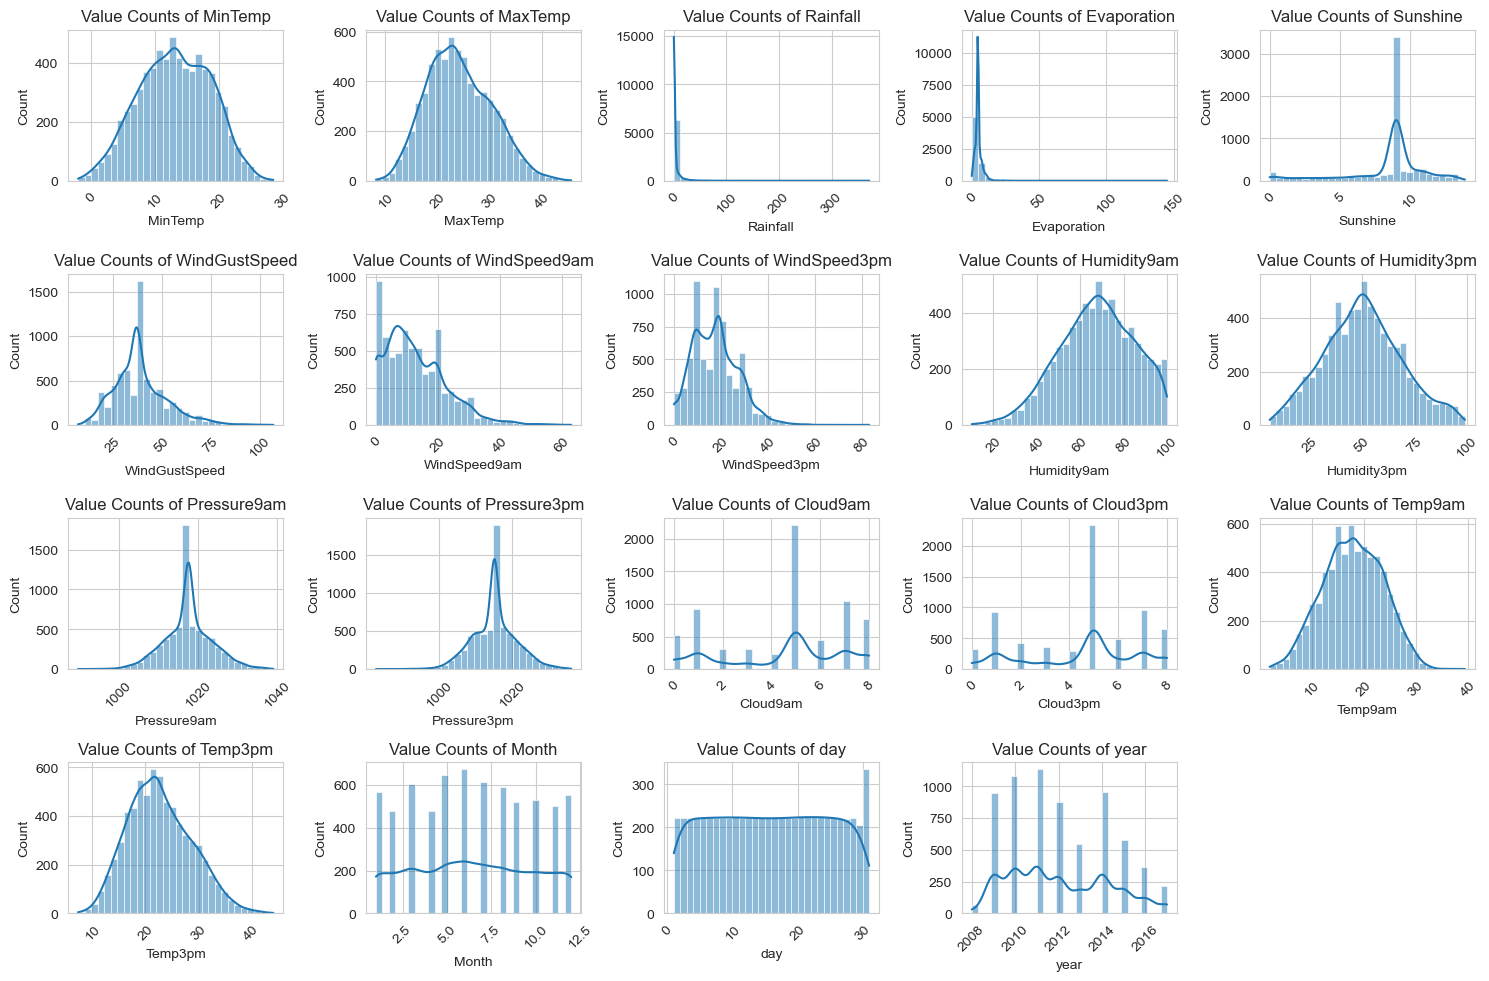

In [113]:
plt.figure(figsize=(15,10))
plotnumber=1    
for i in numerical_col:
    if plotnumber<=20:
        plt.subplot(4, 5, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Value Counts of {i}')
        plt.xticks(rotation=45)
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Observation: Mainly columns are noramally distributed except Evaporation and Rainfall columns which are skewed.

# Encoding:

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i])

In [115]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4     22.9       0.6          4.6       9.0   
1            1      7.4     25.1       0.0          4.6       9.0   
2            1     12.9     25.7       0.0          4.6       9.0   
3            1      9.2     28.0       0.0          4.6       9.0   
4            1     17.5     32.3       1.0          4.6       9.0   
...        ...      ...      ...       ...          ...       ...   
8420         9      2.8     23.4       0.0          4.6       9.0   
8421         9      3.6     25.3       0.0          4.6       9.0   
8422         9      5.4     26.9       0.0          4.6       9.0   
8423         9      7.8     27.0       0.0          4.6       9.0   
8424         9     14.9     23.5       0.0          4.6       9.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13           44.0          13          14  ...       1007.1   
1               6           44.0           6          15  ...       1007.8   
2              13           46.0          13          15  ...       1008.7   
3               9           24.0           9           0  ...       1012.8   
4               1           41.0           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            9           31.0           9           1  ...       1020.3   
8421            9           22.0           9           3  ...       1019.1   
8422            9           37.0           9          14  ...       1016.8   
8423           10           28.0          10           3  ...       1016.5   
8424            2           37.0           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Month  \
0          8.0       5.0     16.9     21.8          0             0   12.0   
1          5.0       5.0     17.2     24.3          0             0   12.0   
2          5.0       2.0     21.0     23.2          0             0   12.0   
3          5.0       5.0     18.1     26.5          0             0   12.0   
4          7.0       8.0     17.8     29.7          0             0   12.0   
...        ...       ...      ...      ...        ...           ...    ...   
8420       5.0       5.0     10.1     22.4          0             0    6.0   
8421       5.0       5.0     10.9     24.5          0             0    6.0   
8422       5.0       5.0     12.5     26.1          0             0    6.0   
8423       3.0       2.0     15.1     26.0          0             0    6.0   
8424       8.0       8.0     15.0     20.9          0             0    6.0   

       day    year  
0      1.0  2008.0  
1      2.0  2008.0  
2      3.0  2008.0  
3      4.0  2008.0  
4      5.0  2008.0  
...    ...     ...  
8420  21.0  2017.0  
8421  22.0  2017.0  
8422  23.0  2017.0  
8423  24.0  2017.0  
8424  25.0  2017.0  

[6762 rows x 25 columns]

KeyboardInterrupt: 

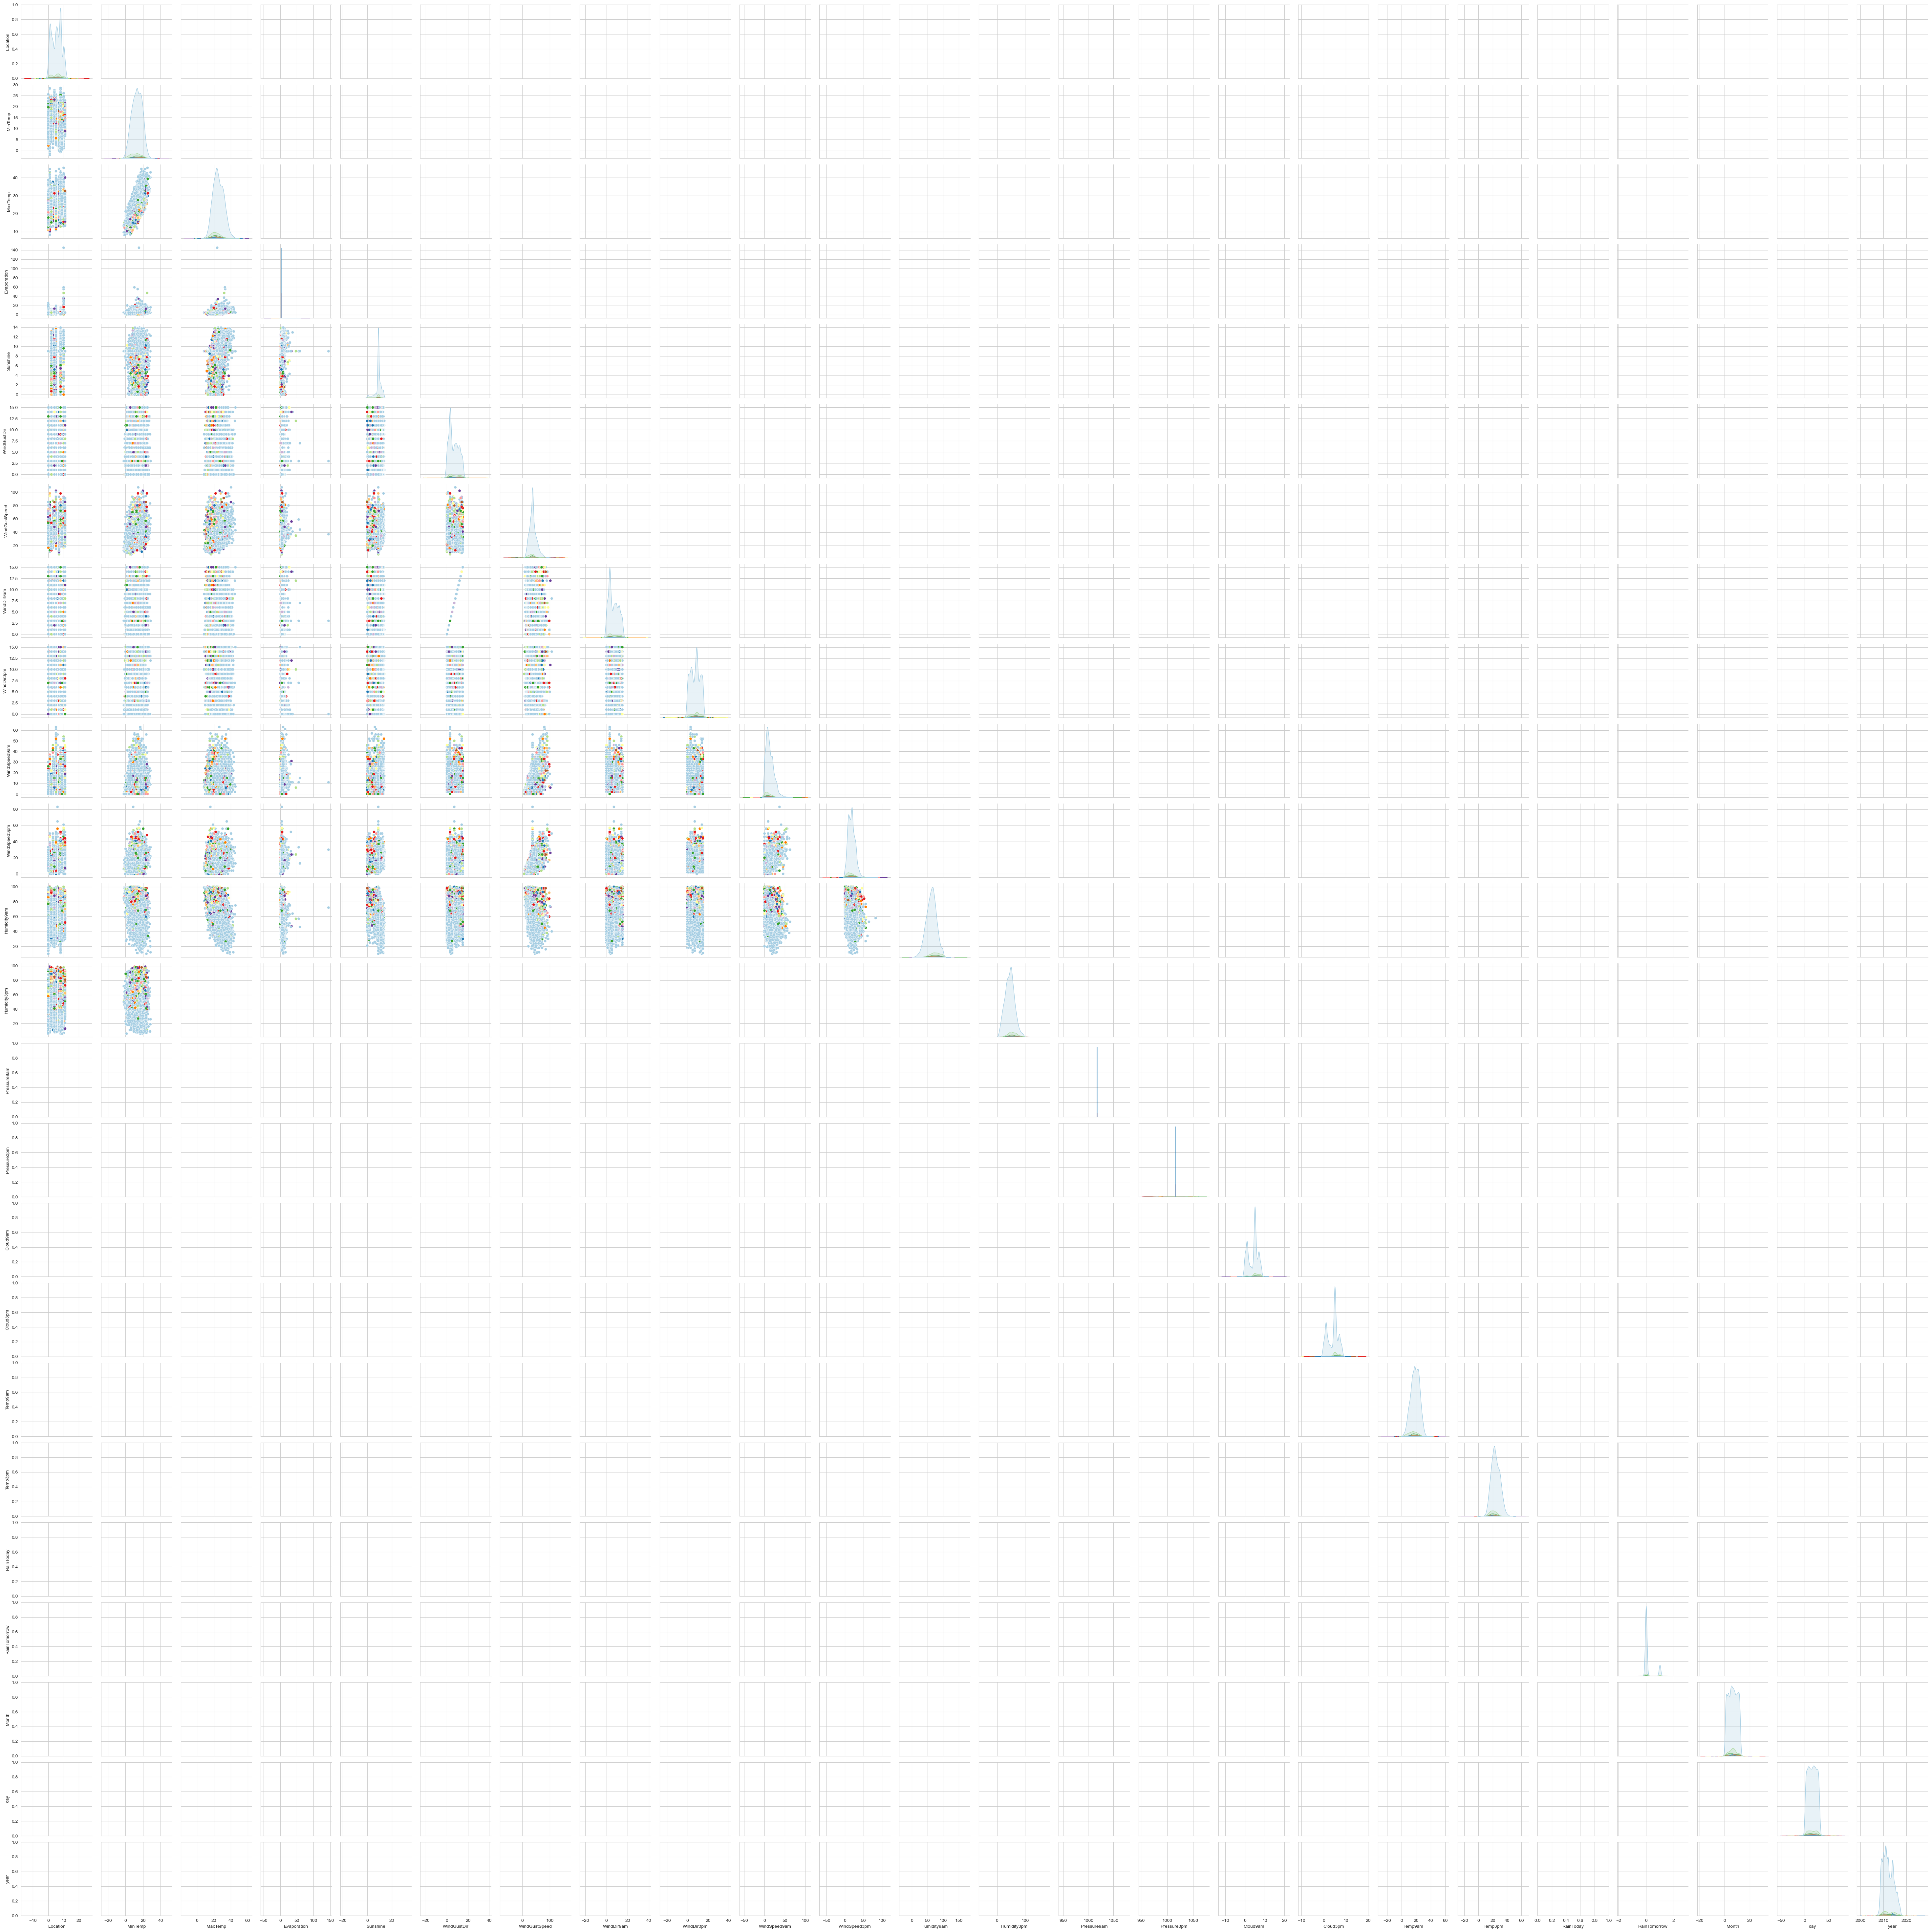

In [116]:
#sns.pairplot(df,hue="Rainfall",palette="Paired" )
#plt.show()

In [ ]:
#sns.pairplot(df,hue="RainTomorrow",palette="Dark2" )
#plt.show()

In [117]:
df.describe().T

count         mean        std     min      25%     50%  \
Location       6762.0     5.323721   3.099455     0.0     2.25     6.0   
MinTemp        6762.0    13.110086   5.540674    -2.0     9.00    13.2   
MaxTemp        6762.0    24.093301   6.130367     8.2    19.60    23.5   
Rainfall       6762.0     2.723410  10.490138     0.0     0.00     0.0   
Evaporation    6762.0     4.998980   3.361770     0.0     4.00     4.6   
Sunshine       6762.0     8.421665   2.789228     0.0     8.80     9.0   
WindGustDir    6762.0     7.013310   4.550702     0.0     3.00     7.0   
WindGustSpeed  6762.0    38.702159  13.393977     7.0    30.00    37.0   
WindDir9am     6762.0     7.013310   4.550702     0.0     3.00     7.0   
WindDir3pm     6762.0     7.842798   4.486894     0.0     4.00     9.0   
WindSpeed9am   6762.0    12.765602   9.789075     0.0     6.00    11.0   
WindSpeed3pm   6762.0    17.562703   9.548883     0.0    11.00    17.0   
Humidity9am    6762.0    67.510500  17.182756    10.0    56.00    68.0   
Humidity3pm    6762.0    50.460515  18.498424     6.0    38.00    50.0   
Pressure9am    6762.0  1017.621222   6.027923   989.8  1014.20  1017.6   
Pressure3pm    6762.0  1015.116060   5.967643   982.9  1011.50  1015.1   
Cloud9am       6762.0     4.519817   2.492344     0.0     2.00     5.0   
Cloud3pm       6762.0     4.511979   2.343253     0.0     3.00     5.0   
Temp9am        6762.0    17.895830   5.722418     1.9    13.90    18.0   
Temp3pm        6762.0    22.700281   5.972262     7.3    18.40    22.1   
RainToday      6762.0     0.232476   0.422442     0.0     0.00     0.0   
RainTomorrow   6762.0     0.232476   0.422442     0.0     0.00     0.0   
Month          6762.0     6.462141   3.377471     1.0     4.00     6.0   
day            6762.0    15.737208   8.793898     1.0     8.00    16.0   
year           6762.0  2012.052203   2.301057  2008.0  2010.00  2012.0   

                  75%     max  
Location          8.0    11.0  
MinTemp          17.4    28.5  
MaxTemp          28.4    45.5  
Rainfall          0.8   371.0  
Evaporation       5.0   145.0  
Sunshine          9.2    13.9  
WindGustDir      11.0    15.0  
WindGustSpeed    46.0   107.0  
WindDir9am       11.0    15.0  
WindDir3pm       12.0    15.0  
WindSpeed9am     19.0    63.0  
WindSpeed3pm     24.0    83.0  
Humidity9am      80.0   100.0  
Humidity3pm      62.0    99.0  
Pressure9am    1020.9  1039.0  
Pressure3pm    1018.4  1036.0  
Cloud9am          7.0     8.0  
Cloud3pm          6.0     8.0  
Temp9am          22.2    39.4  
Temp3pm          26.8    44.1  
RainToday         0.0     1.0  
RainTomorrow      0.0     1.0  
Month             9.0    12.0  
day              23.0    31.0  
year           2014.0  2017.0

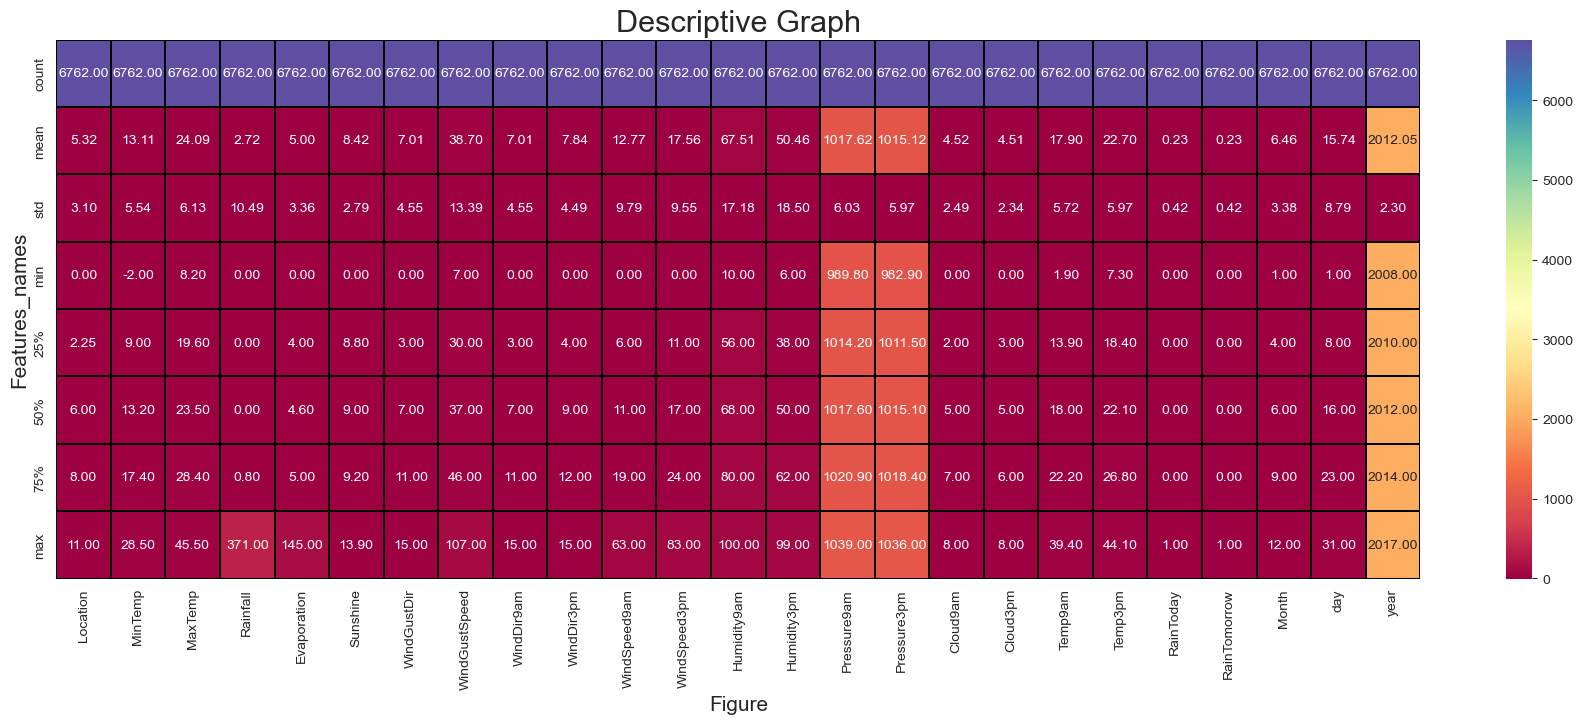

In [118]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.ylabel('Features_names',fontsize=15)
plt.title('Descriptive Graph',fontsize=22)
plt.show()

In [119]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090455  0.070761 -0.004972     0.134965  0.068411   
MinTemp        0.090455  1.000000  0.728059  0.090971     0.284696  0.001976   
MaxTemp        0.070761  0.728059  1.000000 -0.087604     0.356420  0.323262   
Rainfall      -0.004972  0.090971 -0.087604  1.000000    -0.003746 -0.190464   
Evaporation    0.134965  0.284696  0.356420 -0.003746     1.000000  0.251882   
Sunshine       0.068411  0.001976  0.323262 -0.190464     0.251882  1.000000   
WindGustDir   -0.088884 -0.020884 -0.192277  0.091260    -0.073454 -0.093530   
WindGustSpeed  0.254955  0.242823  0.166300  0.086519     0.177502 -0.020876   
WindDir9am    -0.088884 -0.020884 -0.192277  0.091260    -0.073454 -0.093530   
WindDir3pm    -0.001275 -0.139534 -0.161038  0.031770    -0.039664 -0.041657   
WindSpeed9am   0.239883  0.168996  0.056452  0.050206     0.166140 -0.056071   
WindSpeed3pm   0.229565  0.188485  0.115951  0.020421     0.137540  0.003493   
Humidity9am   -0.033586 -0.154218 -0.425100  0.227943    -0.269767 -0.327091   
Humidity3pm   -0.001569  0.067847 -0.430599  0.243005    -0.195361 -0.428461   
Pressure9am   -0.037942 -0.441143 -0.337744 -0.071069    -0.202387  0.003736   
Pressure3pm   -0.024722 -0.440282 -0.413056 -0.032681    -0.217644 -0.050353   
Cloud9am      -0.017268  0.073205 -0.247744  0.184536    -0.093375 -0.488498   
Cloud3pm      -0.021092  0.022233 -0.246742  0.151333    -0.135537 -0.515504   
Temp9am        0.098576  0.891417  0.866654 -0.004365     0.337970  0.185468   
Temp3pm        0.066010  0.696861  0.974994 -0.091795     0.347958  0.344193   
RainToday     -0.004280  0.075902 -0.225526  0.461817    -0.113699 -0.249807   
RainTomorrow  -0.004506  0.097173 -0.160063  0.223599    -0.077340 -0.337550   
Month         -0.067376 -0.237204 -0.171616 -0.015187    -0.002998 -0.005828   
day           -0.000710  0.014356  0.016108 -0.007989     0.011120  0.000706   
year           0.503047  0.032974  0.081092 -0.008516     0.114748  0.134089   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.088884       0.254955   -0.088884   -0.001275  ...   
MinTemp          -0.020884       0.242823   -0.020884   -0.139534  ...   
MaxTemp          -0.192277       0.166300   -0.192277   -0.161038  ...   
Rainfall          0.091260       0.086519    0.091260    0.031770  ...   
Evaporation      -0.073454       0.177502   -0.073454   -0.039664  ...   
Sunshine         -0.093530      -0.020876   -0.093530   -0.041657  ...   
WindGustDir       1.000000      -0.065090    1.000000    0.216648  ...   
WindGustSpeed    -0.065090       1.000000   -0.065090    0.076963  ...   
WindDir9am        1.000000      -0.065090    1.000000    0.216648  ...   
WindDir3pm        0.216648       0.076963    0.216648    1.000000  ...   
WindSpeed9am      0.058798       0.603379    0.058798    0.010617  ...   
WindSpeed3pm      0.045955       0.628393    0.045955    0.084654  ...   
Humidity9am       0.015394      -0.274375    0.015394   -0.005547  ...   
Humidity3pm       0.126914      -0.100244    0.126914   -0.009709  ...   
Pressure9am      -0.027334      -0.393348   -0.027334   -0.139029  ...   
Pressure3pm       0.051862      -0.362226    0.051862   -0.049335  ...   
Cloud9am          0.079251       0.004758    0.079251    0.075979  ...   
Cloud3pm          0.058186       0.042975    0.058186    0.055951  ...   
Temp9am          -0.071205       0.222317   -0.071205   -0.146437  ...   
Temp3pm          -0.200530       0.130483   -0.200530   -0.175251  ...   
RainToday         0.157884       0.085641    0.157884    0.094507  ...   
RainTomorrow      0.040399       0.184400    0.040399    0.004301  ...   
Month             0.019799       0.048189    0.019799    0.034494  ...   
day              -0.014730      -0.002539   -0.014730    0.001723  ...   
year             -0.062314      -0.043982   -0.062314    0.010694  ...   

         

<Axes: >

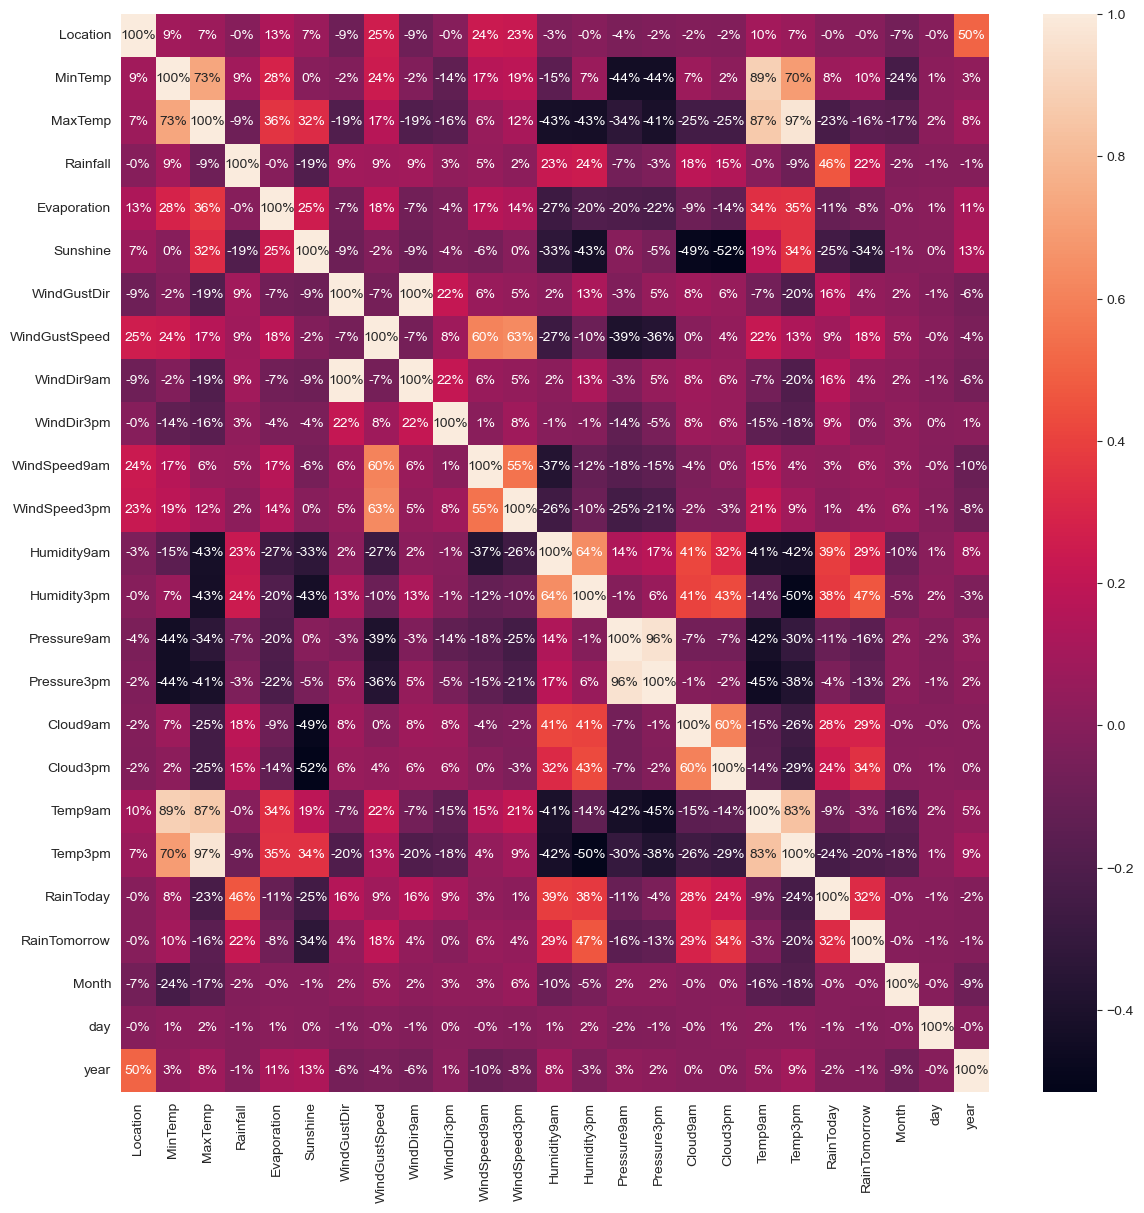

In [120]:
#Heatmap to show the correlation among the datas
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [121]:
corrmatrix=df.corr()
corrmatrix['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.461817
Humidity3pm      0.243005
Humidity9am      0.227943
RainTomorrow     0.223599
Cloud9am         0.184536
Cloud3pm         0.151333
WindGustDir      0.091260
WindDir9am       0.091260
MinTemp          0.090971
WindGustSpeed    0.086519
WindSpeed9am     0.050206
WindDir3pm       0.031770
WindSpeed3pm     0.020421
Evaporation     -0.003746
Temp9am         -0.004365
Location        -0.004972
day             -0.007989
year            -0.008516
Month           -0.015187
Pressure3pm     -0.032681
Pressure9am     -0.071069
MaxTemp         -0.087604
Temp3pm         -0.091795
Sunshine        -0.190464
Name: Rainfall, dtype: float64

In [122]:
corrmatrix=df.corr()
corrmatrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.466880
Cloud3pm         0.344434
RainToday        0.323691
Humidity9am      0.287808
Cloud9am         0.285715
Rainfall         0.223599
WindGustSpeed    0.184400
MinTemp          0.097173
WindSpeed9am     0.057780
WindSpeed3pm     0.043539
WindGustDir      0.040399
WindDir9am       0.040399
WindDir3pm       0.004301
Month           -0.003575
Location        -0.004506
day             -0.007560
year            -0.014769
Temp9am         -0.025768
Evaporation     -0.077340
Pressure3pm     -0.131771
Pressure9am     -0.159118
MaxTemp         -0.160063
Temp3pm         -0.202781
Sunshine        -0.337550
Name: RainTomorrow, dtype: float64

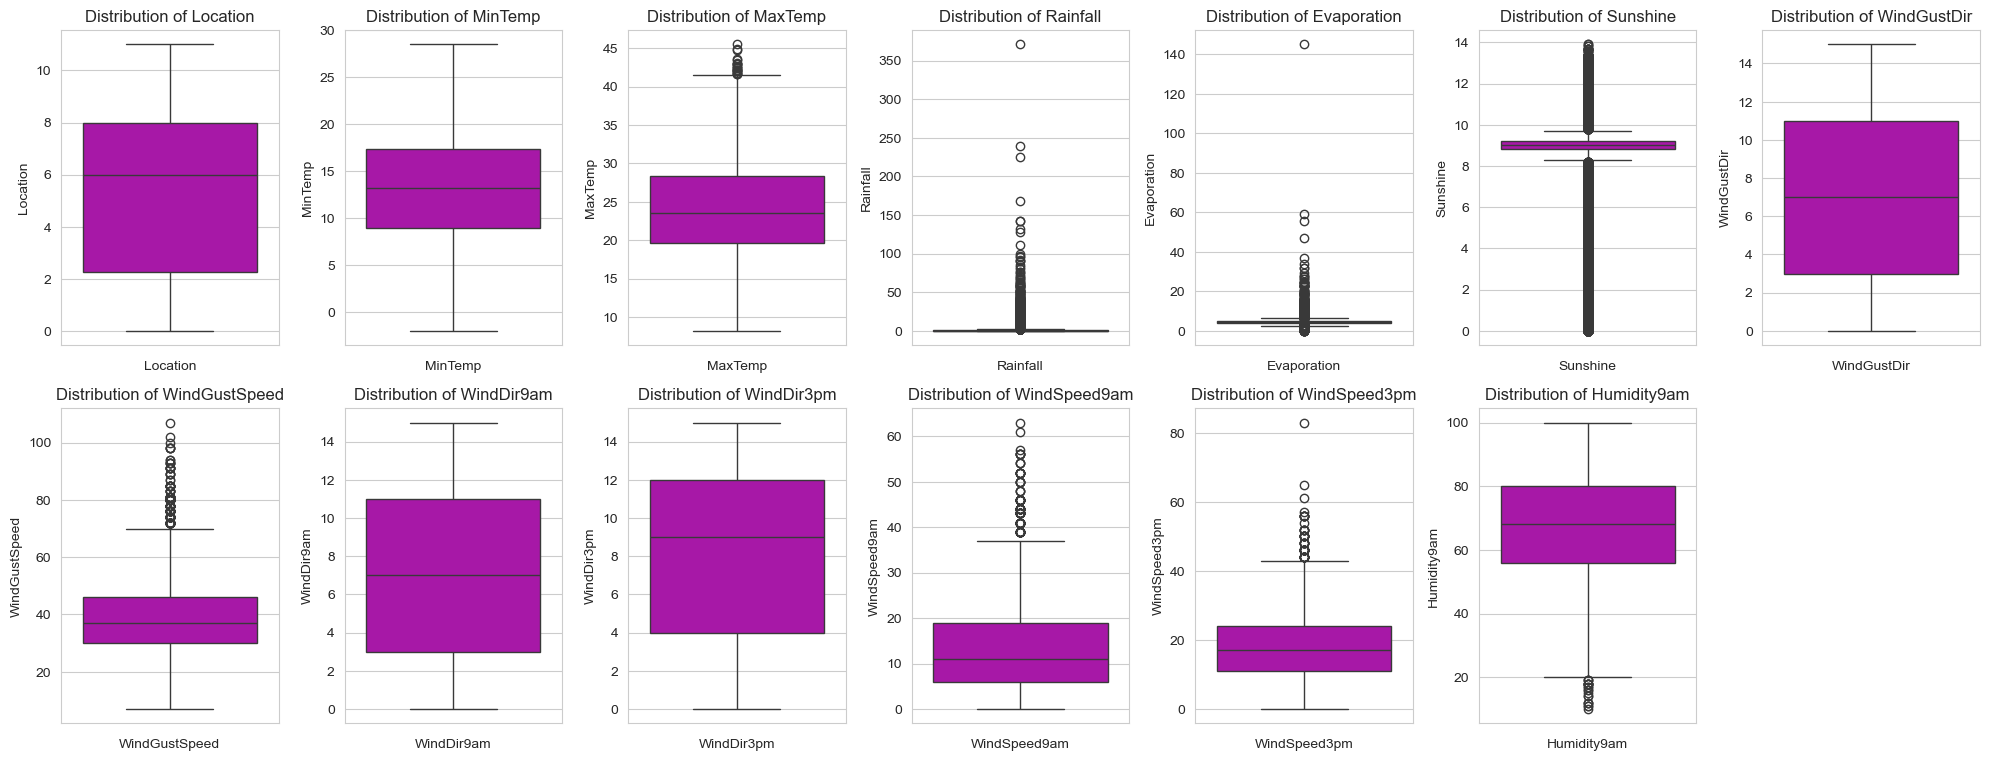

In [123]:
# checking the outliers

plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[0:13]:
    if plotnumber<=13:
        plt.subplot(4, 7, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

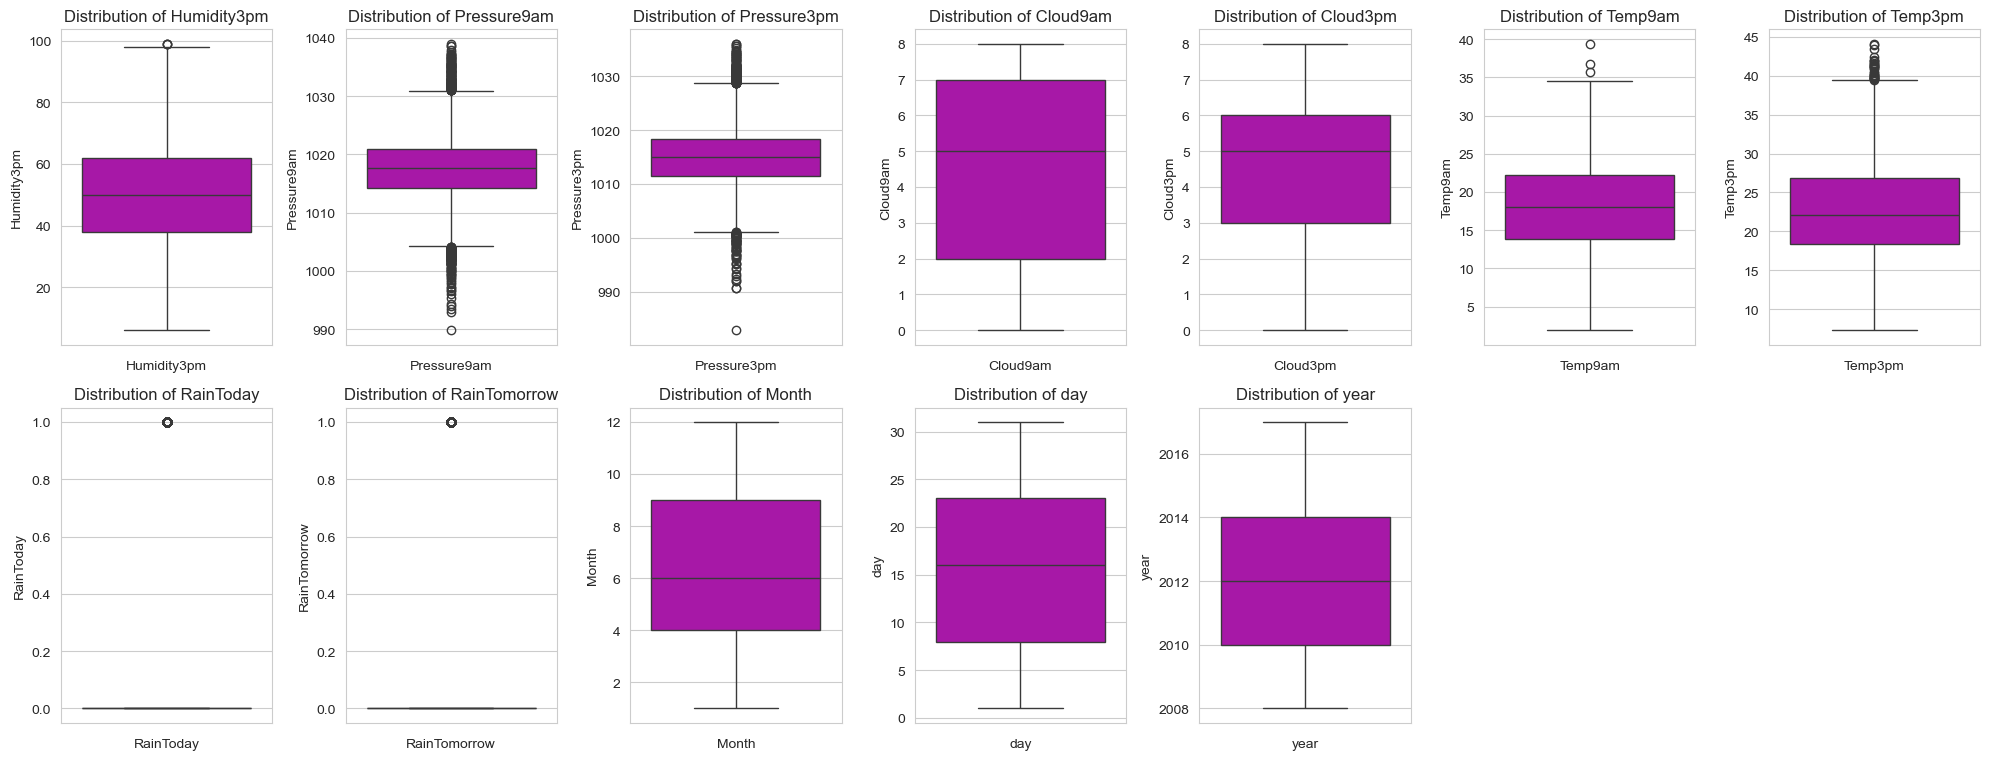

In [124]:
# checking the outliers

plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[13:25]:
    if plotnumber<=13:
        plt.subplot(4, 7, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Black dots are present in many columns, it means most of the data are present outside the distribution. So we have to remove the outliers by using the zscore.

In [125]:
#Removing the Outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
         62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
        381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
        568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
        770,  795,  796,  797,  802,  928,  928,  928,  935,  941,  949,
        978,  979,  979,  980,  980,  980,  980,  981, 1007, 1008, 1008,
       1009, 1010, 1011, 1115, 1138, 1138, 1148, 1148, 1149, 1150, 1151,
       1189, 1202, 1202, 1203, 1237, 1241, 1264, 1264, 1265, 1265, 1356,
       1357, 1386, 1411, 1412, 1413, 1465, 1466, 1479, 1479, 1480, 1480,
       1481, 1486, 1513, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
       1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108,
       2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500,
       2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827, 2835, 2837,
       2849, 2849, 2855, 2859, 2863, 2869, 2877, 2

In [126]:
df_new=df[(z<3).all(axis=1)]
df_new

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4     22.9       0.6          4.6       9.0   
1            1      7.4     25.1       0.0          4.6       9.0   
2            1     12.9     25.7       0.0          4.6       9.0   
3            1      9.2     28.0       0.0          4.6       9.0   
4            1     17.5     32.3       1.0          4.6       9.0   
...        ...      ...      ...       ...          ...       ...   
8420         9      2.8     23.4       0.0          4.6       9.0   
8421         9      3.6     25.3       0.0          4.6       9.0   
8422         9      5.4     26.9       0.0          4.6       9.0   
8423         9      7.8     27.0       0.0          4.6       9.0   
8424         9     14.9     23.5       0.0          4.6       9.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13           44.0          13          14  ...       1007.1   
1               6           44.0           6          15  ...       1007.8   
2              13           46.0          13          15  ...       1008.7   
3               9           24.0           9           0  ...       1012.8   
4               1           41.0           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            9           31.0           9           1  ...       1020.3   
8421            9           22.0           9           3  ...       1019.1   
8422            9           37.0           9          14  ...       1016.8   
8423           10           28.0          10           3  ...       1016.5   
8424            2           37.0           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Month  \
0          8.0       5.0     16.9     21.8          0             0   12.0   
1          5.0       5.0     17.2     24.3          0             0   12.0   
2          5.0       2.0     21.0     23.2          0             0   12.0   
3          5.0       5.0     18.1     26.5          0             0   12.0   
4          7.0       8.0     17.8     29.7          0             0   12.0   
...        ...       ...      ...      ...        ...           ...    ...   
8420       5.0       5.0     10.1     22.4          0             0    6.0   
8421       5.0       5.0     10.9     24.5          0             0    6.0   
8422       5.0       5.0     12.5     26.1          0             0    6.0   
8423       3.0       2.0     15.1     26.0          0             0    6.0   
8424       8.0       8.0     15.0     20.9          0             0    6.0   

       day    year  
0      1.0  2008.0  
1      2.0  2008.0  
2      3.0  2008.0  
3      4.0  2008.0  
4      5.0  2008.0  
...    ...     ...  
8420  21.0  2017.0  
8421  22.0  2017.0  
8422  23.0  2017.0  
8423  24.0  2017.0  
8424  25.0  2017.0  

[6305 rows x 25 columns]

In [127]:
print('shape before removing the outliers:',df.shape)
print('shape after removing the outliers:',df_new.shape)

shape before removing the outliers: (6762, 25)
shape after removing the outliers: (6305, 25)


In [128]:
#%data loss calculation
loss_percent=((6762-6305)/6762)*100
print(loss_percent)

6.758355516119491


6 % loss is acceptable.

In [129]:
df1=df_new

In [130]:
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month',
 'day',
 'year']

In [131]:
#Checking the skewness in data
df1.skew().sort_values()

Sunshine        -1.358828
Cloud9am        -0.400423
Cloud3pm        -0.370944
Humidity9am     -0.224837
WindDir3pm      -0.128511
Temp9am         -0.075437
MinTemp         -0.073640
Location        -0.005041
day              0.005324
Month            0.030646
Pressure9am      0.067423
Pressure3pm      0.088337
Humidity3pm      0.139294
WindDir9am       0.214975
WindGustDir      0.214975
MaxTemp          0.263690
Temp3pm          0.288331
year             0.338266
WindSpeed3pm     0.342765
WindGustSpeed    0.544830
WindSpeed9am     0.680216
Evaporation      1.136753
RainToday        1.371384
RainTomorrow     1.383878
Rainfall         3.572436
dtype: float64

WindSpeed9am and Evaporation which are continuous numerical columns has Skewness. So Let's remove the skewness.
RainToday is Object datatype. Rainfall and RainTomorrow are the target Variable.

In [132]:
skew1 =['WindSpeed9am', 'Evaporation']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df1[skew1] = scaler.fit_transform(df1[skew1].values)
df1[skew1].skew()

WindSpeed9am   -0.132272
Evaporation     0.059545
dtype: float64

In [133]:
df1.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     0.010453       9.0           13   
1         1      7.4     25.1       0.0     0.010453       9.0            6   
2         1     12.9     25.7       0.0     0.010453       9.0           13   
3         1      9.2     28.0       0.0     0.010453       9.0            9   
4         1     17.5     32.3       1.0     0.010453       9.0            1   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1       8.0   
1           44.0           6          15  ...       1007.8       5.0   
2           46.0          13          15  ...       1008.7       5.0   
3           24.0           9           0  ...       1012.8       5.0   
4           41.0           1           7  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Month  day    year  
0       5.0     16.9     21.8          0             0   12.0  1.0  2008.0  
1       5.0     17.2     24.3          0             0   12.0  2.0  2008.0  
2       2.0     21.0     23.2          0             0   12.0  3.0  2008.0  
3       5.0     18.1     26.5          0             0   12.0  4.0  2008.0  
4       8.0     17.8     29.7          0             0   12.0  5.0  2008.0  

[5 rows x 25 columns]

# For target variable: Rainfall

In [134]:
dfr=df1

<Axes: >

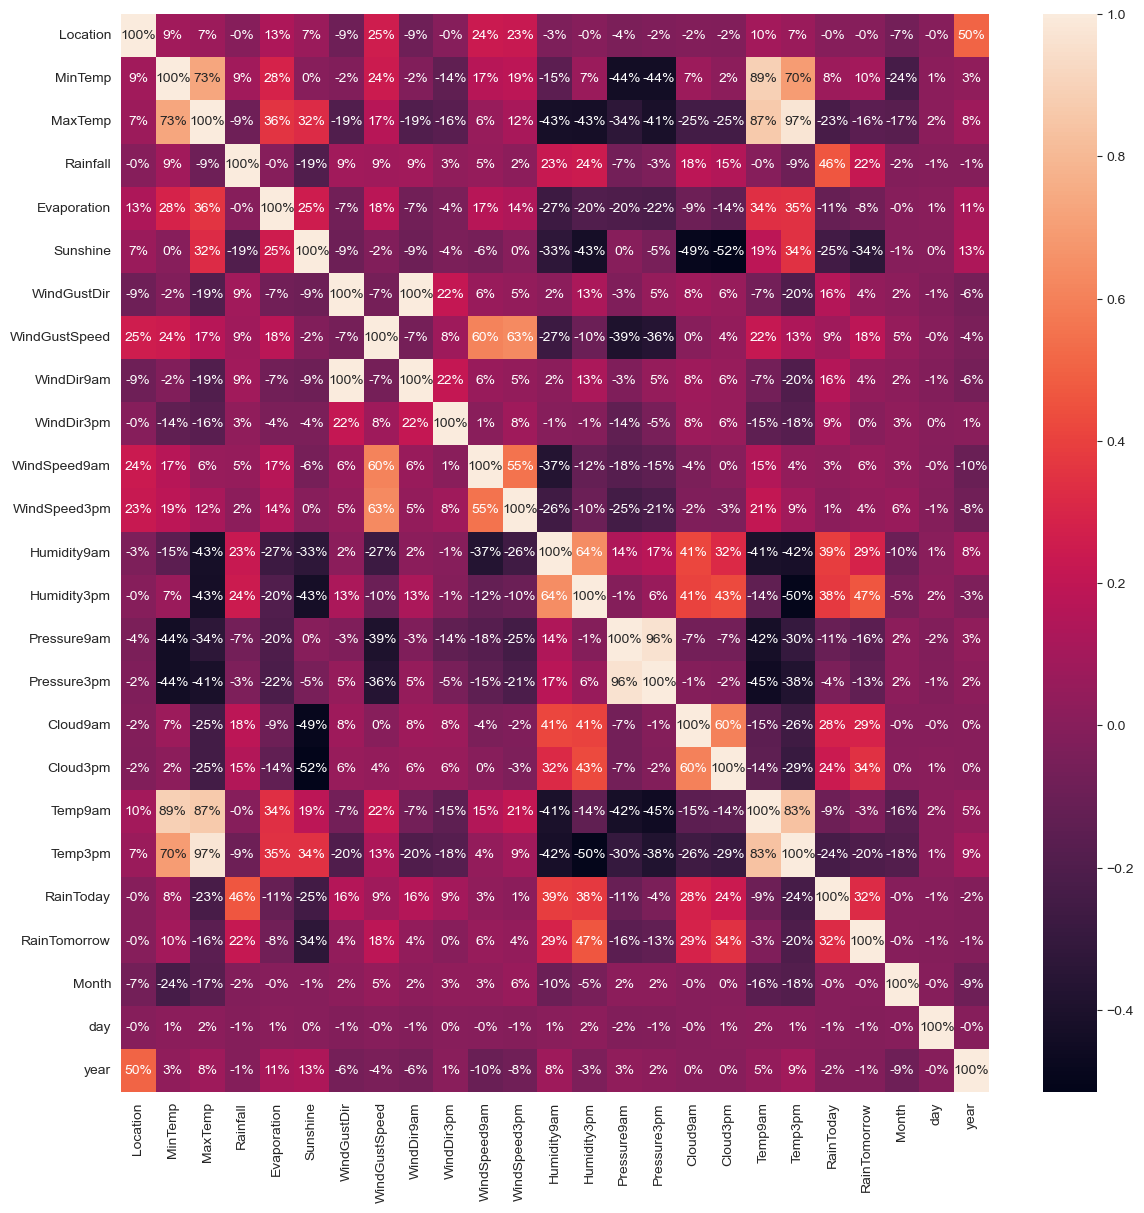

In [135]:
#Heatmap to show the correlation among the datas
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [138]:
x = dfr.drop(['Rainfall','Pressure9am','Temp3pm' ], axis =1) # Pressure9am and Temp3Pm have the highest correlation with Pressure9pm and Temp3am 
y= dfr['Rainfall']

In [139]:
#Using StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.39081955,  0.07696121, -0.20077769, ...,  1.65399403,
        -1.67189736, -1.77104181],
       [-1.39081955, -1.00548016,  0.16475898, ...,  1.65399403,
        -1.55812541, -1.77104181],
       [-1.39081955, -0.01324224,  0.2644508 , ...,  1.65399403,
        -1.44435346, -1.77104181],
       ...,
       [ 1.19498723, -1.36629394,  0.46383444, ..., -0.13598749,
         0.83108563,  2.15373237],
       [ 1.19498723, -0.9333174 ,  0.48044975, ..., -0.13598749,
         0.94485758,  2.15373237],
       [ 1.19498723,  0.34757155, -0.10108587, ..., -0.13598749,
         1.05862954,  2.15373237]])

In [140]:
y.value_counts()

Rainfall
0.0     4261
0.2      299
0.4      137
0.6       81
1.2       64
        ... 
2.5        1
2.9        1
31.1       1
23.8       1
26.8       1
Name: count, Length: 166, dtype: int64

In [141]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split


#Finding best Random state
maxR2S=0
maxRS=0
for i in range(50,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2score=r2_score(y_test,predlr)
    if r2score>maxR2S:
        maxR2S=r2score
        maxRS=i
print('Best accuracy is',maxR2S,'on Random_state',maxRS)

Best accuracy is 0.5328699377296335 on Random_state 82


In [142]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=82)

In [151]:
from sklearn.model_selection import cross_val_score

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors= 19),SVR(kernel='poly'),SVR(kernel='linear'),SVR(kernel='rbf') ,GradientBoostingRegressor(),RandomForestRegressor(), Lasso(.00001),Ridge(.00001),ElasticNet(.00001)]
#model=[KNeighborsRegressor(n_neighbors= 19)]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("error:")
    print("Mean squared error:", mean_squared_error(y_test, predm))
    print("Mean absolute error:", mean_absolute_error(y_test, predm))
    print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predm)))
    print("R2 Score of ",m,"is: ",r2_score(y_test, predm))
    sc=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Cross validation score of',m,"is: ",sc.mean())
    print("Difference between r2 score and cross validation score is", r2_score(y_test, predm)-sc.mean())
    print()
    print()
    print()
    print("------------------------------------------------------")   

error:
Mean squared error: 8.60575497174543
Mean absolute error: 1.3853727321521287
Root Mean squared error: 2.9335567101635225
R2 Score of  LinearRegression() is:  0.5328699377296335
Cross validation score of LinearRegression() is:  0.49711747095947717
Difference between r2 score and cross validation score is 0.035752466770156366



------------------------------------------------------
error:
Mean squared error: 17.810317124735725
Mean absolute error: 1.509936575052854
Root Mean squared error: 4.220227141367598
R2 Score of  DecisionTreeRegressor() is:  0.033235947938527466
Cross validation score of DecisionTreeRegressor() is:  -0.09331817405823158
Difference between r2 score and cross validation score is 0.12655412199675903



------------------------------------------------------
error:
Mean squared error: 8.90624210116367
Mean absolute error: 1.1295065094024703
Root Mean squared error: 2.98433277319465
R2 Score of  KNeighborsRegressor(n_neighbors=19) is:  0.5165591582643292
Cross v

Best Model is RandomForestRegressor which has highest r2 score 55% and  Linear Regression have the minimum difference between r2 score and cross validation score  i.e. .035 but we used the Ridge Regularization technique for the final model which has the 53% r2 score.

# Hyperparameter Tuning

In [156]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Setting values for the parameters


parameters = {
             
   'fit_intercept': [True,False],
    'solver': ['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
    'positive': [True,False],
    'random_state': [1,4,10,20]
}


grid_search = GridSearchCV(estimator=Ridge(alpha=.00001), param_grid=parameters, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'fit_intercept': True, 'positive': True, 'random_state': 1, 'solver': 'auto'}
0.49270089843631426


In [157]:
Finalmodel=Ridge(fit_intercept=True,positive=True,random_state=1,solver='auto')
Finalmodel.fit(x_train,y_train)
pred=Finalmodel.predict(x_test)

In [158]:
print("error:")
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2 Score is: ",r2_score(y_test, pred))

error:
Mean squared error: 8.605213662009659
Mean absolute error: 1.3590437099256578
Root Mean squared error: 2.933464447033517
R2 Score is:  0.5328993206311231


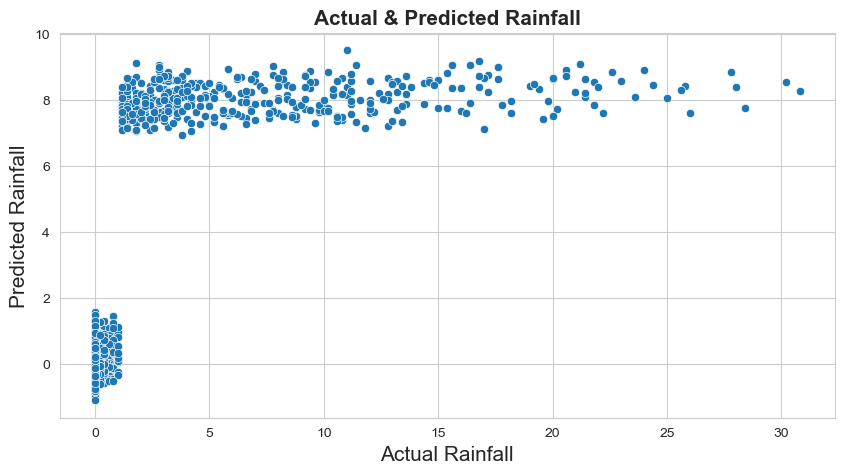

In [160]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test.round(2), y=pred)
plt.xlabel("Actual Rainfall", fontsize= 15)
plt.ylabel("Predicted Rainfall",fontsize= 15)
plt.title("Actual & Predicted Rainfall" , fontsize= 15, fontweight= 'bold')
plt.show()

In [161]:
import pickle
filename='Rainfall_Regressor.pkl'
pickle.dump(Finalmodel,open(filename,'wb'))

In [162]:
loaded_model=pickle.load(open('Rainfall_Regressor.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

53.28993206311231


In [163]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

0         1         2         3         4         5     \
predicted  0.724563 -0.343484 -0.289296  0.427853  0.178509 -0.069033   
original   0.000000  0.000000  0.200000  0.500000  0.000000  0.000000   

               6         7        8         9     ...      1882      1883  \
predicted  0.600419 -0.201621  0.15312 -0.222995  ... -0.567375 -0.121243   
original   0.000000  0.200000  0.00000  0.000000  ...  0.000000  0.000000   

               1884      1885      1886     1887      1888      1889  \
predicted  0.491936 -0.294303 -0.021725  0.25157 -0.115255 -0.360432   
original   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   

               1890      1891  
predicted  0.145593  0.236964  
original   0.000000  0.000000  

[2 rows x 1892 columns]

# For target variable: RainTomorrow

In [194]:
x1 = df1.drop(['RainTomorrow','Pressure9am','Temp3pm'], axis =1) # Pressure9am and Temp3Pm have the highest correlation with Pressure9pm and Temp3am 
y1= df1['RainTomorrow']

In [195]:
y1.value_counts()

RainTomorrow
0    4946
1    1359
Name: count, dtype: int64

In [196]:
SM=SMOTE()
x2,y2=SM.fit_resample(x1,y1)

In [197]:
y2.value_counts()

RainTomorrow
0    4946
1    4946
Name: count, dtype: int64

In [198]:
#Using StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x2=scaler.fit_transform(x2)
x2

array([[-1.43613539,  0.02770531, -0.08562838, ...,  1.74440759,
        -1.70506134, -1.84204699],
       [-1.43613539, -1.09440995,  0.29074163, ...,  1.74440759,
        -1.58955654, -1.84204699],
       [-1.43613539, -0.0658043 ,  0.39338799, ...,  1.74440759,
        -1.47405174, -1.84204699],
       ...,
       [-1.09678438,  1.11132276,  0.59699692, ..., -1.72466533,
        -0.18537423, -0.03519426],
       [ 0.59997066,  0.78119378,  0.37663246, ...,  0.4546719 ,
         1.00412725, -1.1130718 ],
       [ 0.26061965, -0.75006588, -0.98481406, ..., -0.14735648,
         0.4318612 , -0.0365049 ]])

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [200]:
#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.30,random_state=i)
    lgr=LogisticRegression()
    lgr.fit(x_train,y_train)
    predlgr=lgr.predict(x_test)
    acc=accuracy_score(y_test,predlgr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.7988544474393531 on Random_state 136


In [201]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.30, random_state=136)

In [202]:
model=[LogisticRegression(),DecisionTreeClassifier(),ExtraTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),BaggingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    
    print("Accuracy of",m,"is:   ",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print()
    print("Cross Validation of",m," :")
    scr=cross_val_score(m,x1,y1,cv=5,scoring='accuracy')
    print("score mean:",scr.mean())
    print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predm)-scr.mean())

    print()
    print()
    print("--------------------------------------------------------------------------")   

Accuracy of LogisticRegression() is:    0.7988544474393531
[[1182  302]
 [ 295 1189]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1484
           1       0.80      0.80      0.80      1484

    accuracy                           0.80      2968
   macro avg       0.80      0.80      0.80      2968
weighted avg       0.80      0.80      0.80      2968


Cross Validation of LogisticRegression()  :
score mean: 0.827755749405234
Difference between accuracy score and cross validation score is -0.02890130196588092


--------------------------------------------------------------------------
Accuracy of DecisionTreeClassifier() is:    0.8305256064690026
[[1208  276]
 [ 227 1257]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1484
           1       0.82      0.85      0.83      1484

    accuracy                           0.83      2968
   macro avg       0.83      0.83      0.8

RandomForestClassifier model has the highest accuracy which is 90.8% (this may be due to overfitting). so we also checked the cross validation of each model for actual accuracy. After Cross Validation, we found out that the minimum difference between the accuracy score and cross validation score is given by Logistic Regression(). Final model is Logistic Regression which has the 79.89% actual accuracy (accuracy score).

# With HyperParameter Tuning

In [204]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Setting values for the parameters


parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    
   
}

gridsearch = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
{'C': 4.281332398719396, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
0.7719526285384172


In [205]:
#Fitting the AdaBoostClassifier model with the best hyper parameters obtained through GridSearchCV
FinalModel1=LogisticRegression(C= 4.281332398719396, max_iter= 1000, penalty='l2', solver= 'saga')
FinalModel1.fit(x_train,y_train)
pred=FinalModel1.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy score:',acc*100)
print("Confusion Matrix: \n ",confusion_matrix(y_test,pred))
print("Classification Report: \n",classification_report(y_test,pred))

Accuracy score: 79.85175202156334
Confusion Matrix: 
  [[1182  302]
 [ 296 1188]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1484
           1       0.80      0.80      0.80      1484

    accuracy                           0.80      2968
   macro avg       0.80      0.80      0.80      2968
weighted avg       0.80      0.80      0.80      2968



Roc_auc Score 79.85175202156334





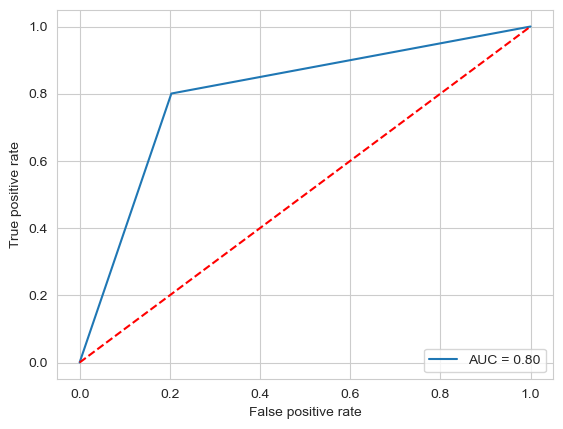

In [213]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc( false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 'lower right')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
print("\n\n")

In [206]:
import pickle
filename='Rainfall_RainTomorrow_classification.pkl'
pickle.dump(FinalModel1,open(filename,'wb'))

In [207]:
import pickle
loaded_model1=pickle.load(open('Rainfall_RainTomorrow_classification.pkl','rb'))
result1=loaded_model1.score(x_test,y_test)
print(result1*100)

79.85175202156334


In [208]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
predicted     1     1     0     1     0     1     0     1     0     1  ...   
original      1     1     0     1     0     1     0     1     0     1  ...   

           2958  2959  2960  2961  2962  2963  2964  2965  2966  2967  
predicted     0     0     0     0     1     0     1     1     1     0  
original      0     0     0     0     1     0     0     1     0     1  

[2 rows x 2968 columns]